<a href="https://colab.research.google.com/github/spahlavian/Intro-to-DL-with-fastai/blob/main/Intro_to_DL_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~ Practical Deep Learning tutorial -- Episode 4 ~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

No licensing is required to use this code, but I will
appreciate  if you reference Rational Machines
IG page and/or YT channel:
@rational_machines
bit.ly/3rU7nKY

-- Written by: Soroush Pahlavian - 2021
"""

In [ ]:
!pip install -Uqq fastbook
import fastbook
# fastbook.setup_book()
from fastbook import *
from fastai.vision.all import *

# Libraries needed for web-scraping:
!pip install kora -q
!pip install Pillow
from kora.selenium import wd as webdriver
from pathlib import Path

In [ ]:
dest = '/content/DataML'
path = untar_data (URLs.PETS, dest=dest) / 'images'

# def is_cat(x):
#      return x[0].isupper() 

# dls = ImageDataLoaders.from_name_func(
#     path=path,
#     fnames=get_image_files(path),        
#     valid_pct=0.2, seed=42,
#     label_func=is_cat,
#     item_tfms=Resize(224)
# )

In [ ]:
import shutil
def catagorize_files(input_path, dest_path):
    if not os.path.exists(dest_path):
        os.mkdir(dest_path)
        os.mkdir(dest_path / 'Dog')
        os.mkdir(dest_path / 'Cat')
        # os.mkdir(dest_path / 'Keanu')
    files = input_path.ls()
    for f_ind in range(len(files)):
        if files[f_ind].name[0].isupper():
            shutil.copy(files[f_ind], dest_path/'Cat'/files[f_ind].name)
        else:
            shutil.copy(files[f_ind], dest_path/'Dog'/files[f_ind].name)
            

In [ ]:
dest_path = Path('/content/DataML/my_images')
catagorize_files(path, dest_path)

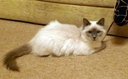

In [ ]:
img_path = (dest_path/'Cat').ls()[34]
img = PILImage.create(img_path)
# show_image(img);
img.to_thumb(128)

We can check if it was done correctly:

In [ ]:
sample_list = list((dest_path/'Cat').ls()[:10])

In [ ]:
img = PILImage.create(sample_list[5])
# show_image(img);
img.to_thumb(256)

Now, let's add Keanu:


Import the web-scraping function

In [ ]:
from kora.selenium import wd as webdriver
from pathlib import Path

In [ ]:
!git clone https://github.com/spahlavian/web-scraper.git

Cloning into 'web-scraper'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 22 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (22/22), done.


In [ ]:
import sys
sys.path.append("/content/web-scraper")

from webScrapper import search_and_download



In [ ]:
search_term = 'keanu reeves headshot'

dest_path = Path('/content/DataML/my_images')


search_and_download(
    search_term=search_term,
    wd=webdriver,
    target_path=dest_path/'Keanu',
    number_of_images=50,
    sleep_time=1)

/content/DataML/my_images/Keanu/1535d332d7.jpg


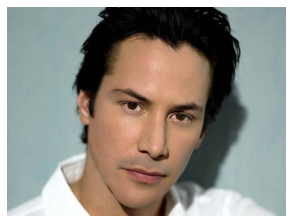

In [ ]:
img_path = get_image_files(dest_path/'Keanu')[3]
print(img_path)
img = PILImage.create(img_path)
show_image(img);

In [ ]:
def label_func(x): 
    return x.parent.name

dls = ImageDataLoaders.from_path_func(
    path=dest_path,
    fnames=get_image_files(dest_path),        
    valid_pct=0.2,
    seed=42,
    label_func=label_func,
    item_tfms=Resize(224)
)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.248486,0.029942,0.006680,00:53


epoch,train_loss,valid_loss,error_rate,time
0,0.101828,0.015451,0.004008,00:57


In [ ]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(uploader.data[0])
prediction,_,probs = learn.predict(img)
print(f'Prediction: {prediction}')
print(probs)

Prediction: Keanu
tensor([1.1265e-04, 4.0031e-01, 5.9958e-01])


In [ ]:
dls.vocab

['Cat', 'Dog', 'Keanu']